# London Weather


## Nature of the data

Variables included as columns: 

1. **date** - recorded date of measurement - (int)
2. cloud_cover - cloud cover measurement in oktas - (float)
3. sunshine - sunshine measurement in hours (hrs) - (float)
4. global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)
5. max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)
6. mean_temp - mean temperature in degrees Celsius (°C) - (float)
7. min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)
8. precipitation - precipitation measurement in millimeters (mm) - (float)
9. pressure - pressure measurement in Pascals (Pa) - (float)
10. snow_depth - snow depth measurement in centimeters (cm) - (float)

source: https://www.ecad.eu/dailydata/index.php
available at [Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data).

In [149]:
# Import main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
import statsmodels.api as sm

%matplotlib inline

In [150]:
# Access the file
file_path = '/Users/alexandrehefren/Documents/Projects_Python/Weather/london_weather.csv'

# Original dataframe for reference 
original_df = pd.read_csv(file_path)

# weather dataframe for exploring the data
weather = original_df.copy()

In [151]:
# Head
weather.head(10)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
5,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
6,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
7,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
8,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0
9,19790110,7.0,1.9,30.0,4.9,3.3,1.4,2.1,98700.0,0.0


## Data description

As a time series, the 'date' is an essential part of the data.

In [152]:
print(f'Shape: {weather.shape}')

Shape: (15341, 10)


In [153]:
weather.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [154]:
# NaN values
weather.isna().sum() # that will require some treatment later

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [155]:
# Convert to datetime format before any exploration
weather['date'] = pd.to_datetime(weather['date'],  format='%Y%m%d', dayfirst=False)

# Check that all dates are converted as expected
print(weather['date'].head())
weather['date'].tail()

0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: date, dtype: datetime64[ns]


15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, dtype: datetime64[ns]

In [156]:
# Describe with fixed date
weather[['date', 'mean_temp']].describe(datetime_is_numeric=True)

,date,mean_temp
count,15341,15305.000000
mean,2000-01-01 00:00:00,11.475511
min,1979-01-01 00:00:00,-7.600000
25%,1989-07-02 00:00:00,7.000000
50%,2000-01-01 00:00:00,11.400000
75%,2010-07-02 00:00:00,16.000000
max,2020-12-31 00:00:00,29.000000
std,NaN,5.729709


In [157]:
# Set 'date' as the index for our time series
weather.set_index('date', inplace=True)

In [158]:
# Check what are the data types
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   max_temp          15335 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15339 non-null  float64
 6   precipitation     15335 non-null  float64
 7   pressure          15337 non-null  float64
 8   snow_depth        13900 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Data Analysis

### Questions and exploration



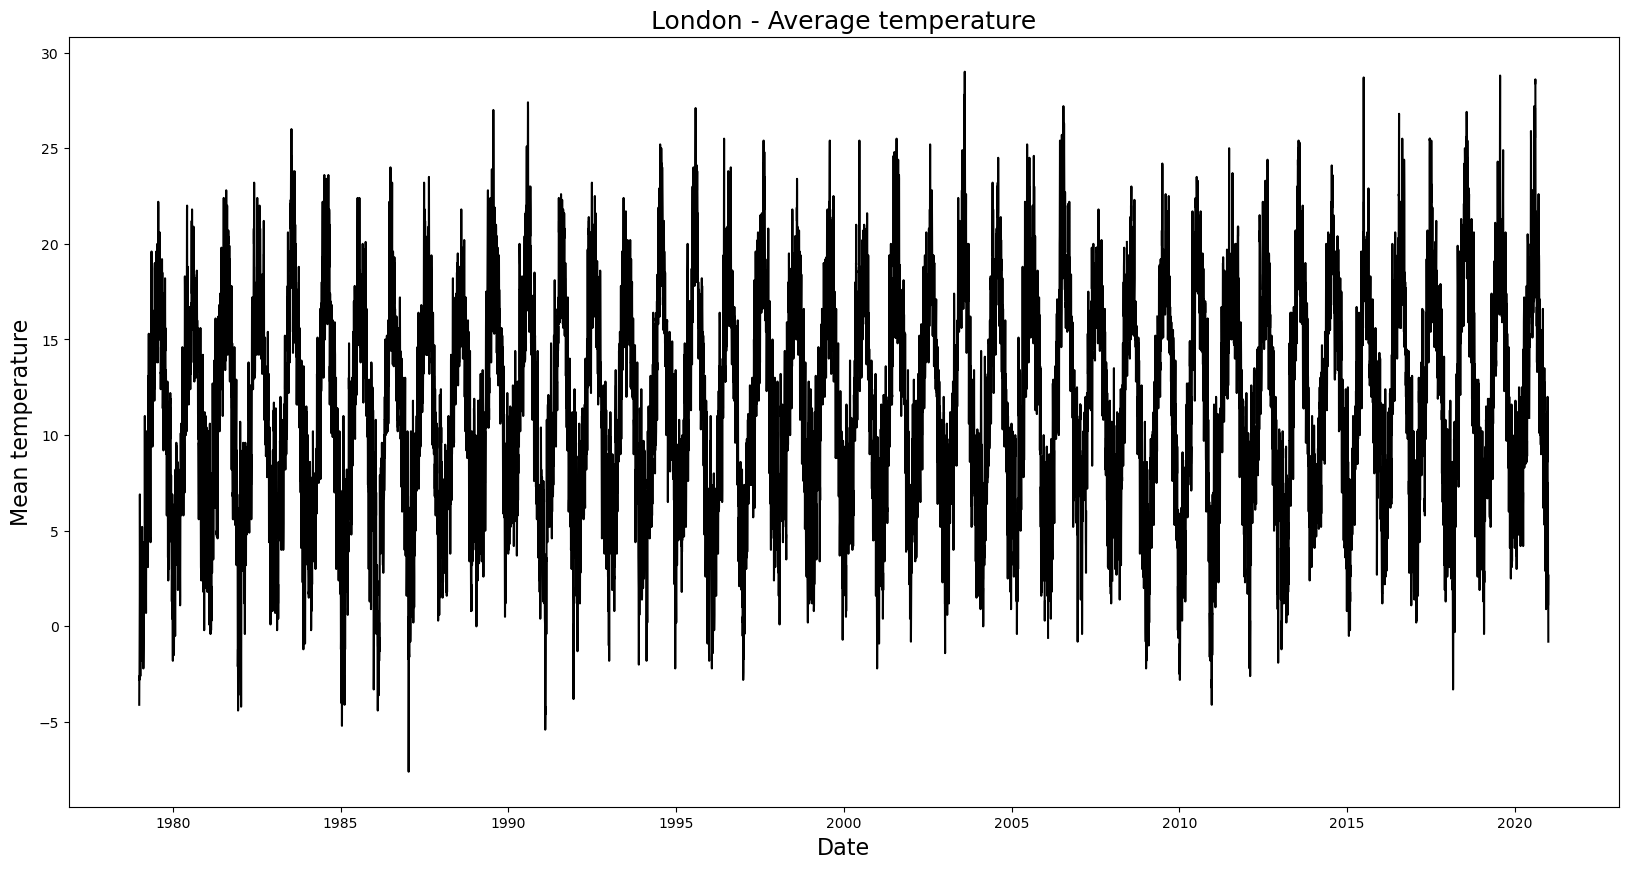

In [159]:
plt.figure(figsize=(20, 10))
plt.plot(weather.index, weather['mean_temp'], color= 'black')
plt.title('London - Average temperature', size=18)

plt.xlabel('Date', size=16)
plt.ylabel('Mean temperature', size=16)
plt.show()

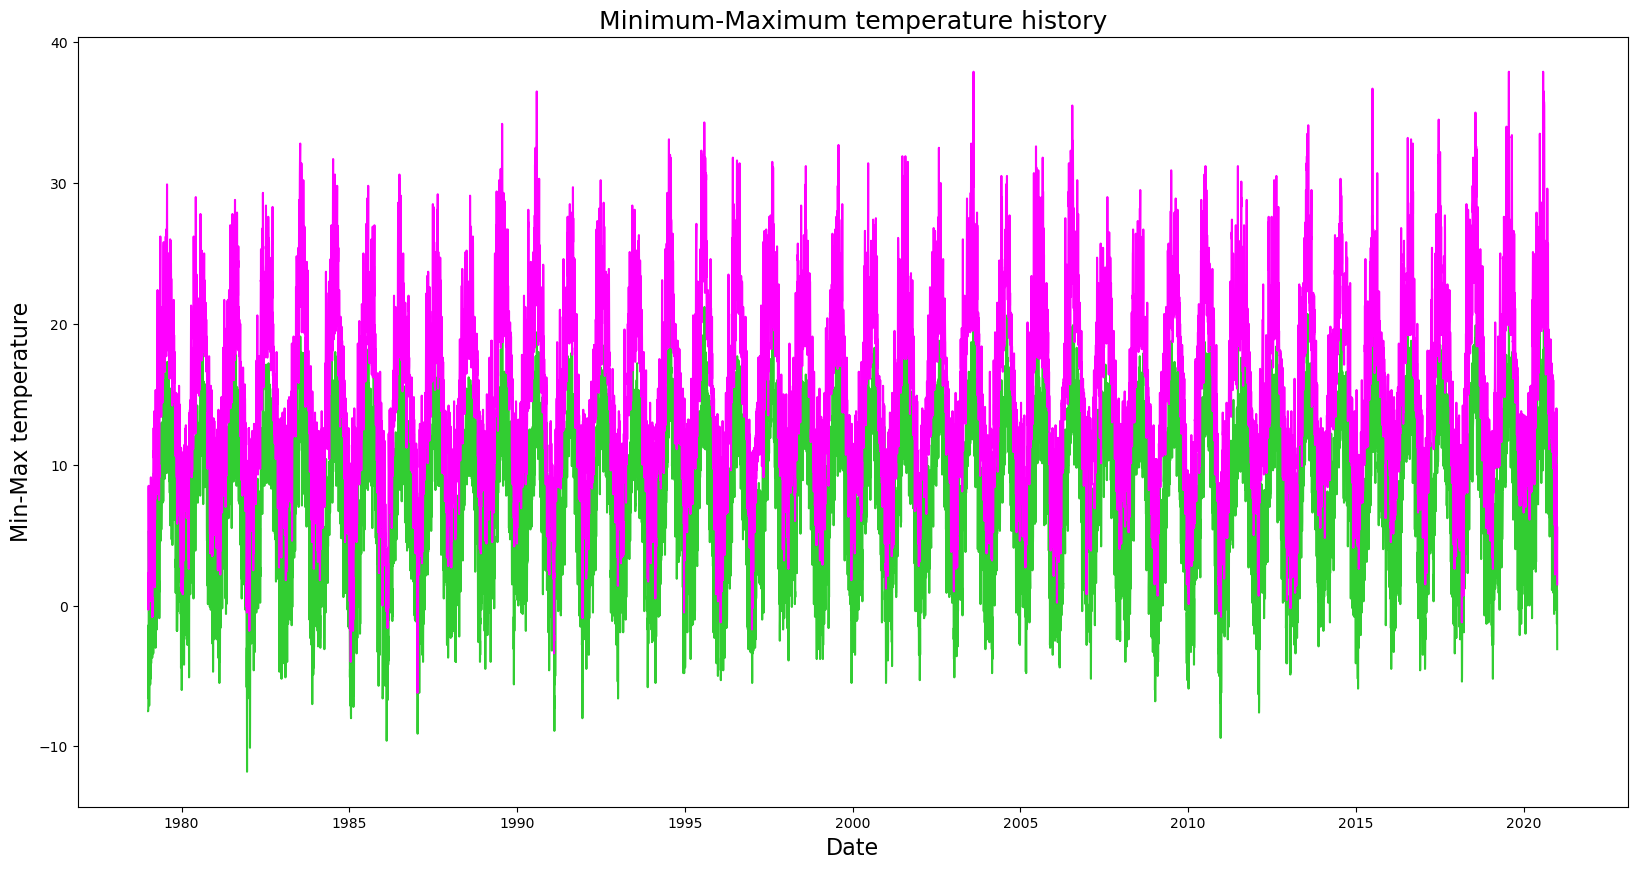

In [160]:
plt.figure(figsize=(20, 10))
plt.plot(weather.index, weather['min_temp'], color= 'limegreen')
plt.plot(weather.index, weather['max_temp'], color= 'magenta')


plt.xlabel('Date', size=16)
plt.ylabel('Min-Max temperature', size=16)
plt.title('Minimum-Maximum temperature history', size=18)
plt.show()


# weather['min_temp'].plot(figsize=(20,5), color='limegreen')
# weather['max_temp'].plot(figsize=(20,5), color='magenta')
# plt.title()

# plt.show()

As a reminder, we note that the current dataset is strictly about London, which is not the rainiest city in the UK and is not even among the top rainiest cities such as Glasgow and Manchester. London is, however, the most populous city in the UK and thus gets most of the attention.

One can check the [source](https://www.ecad.eu/dailydata/index.php) for details about some of the variables and information about the data collection. As an example, see information below on a London station regarding the precipitation ammount.

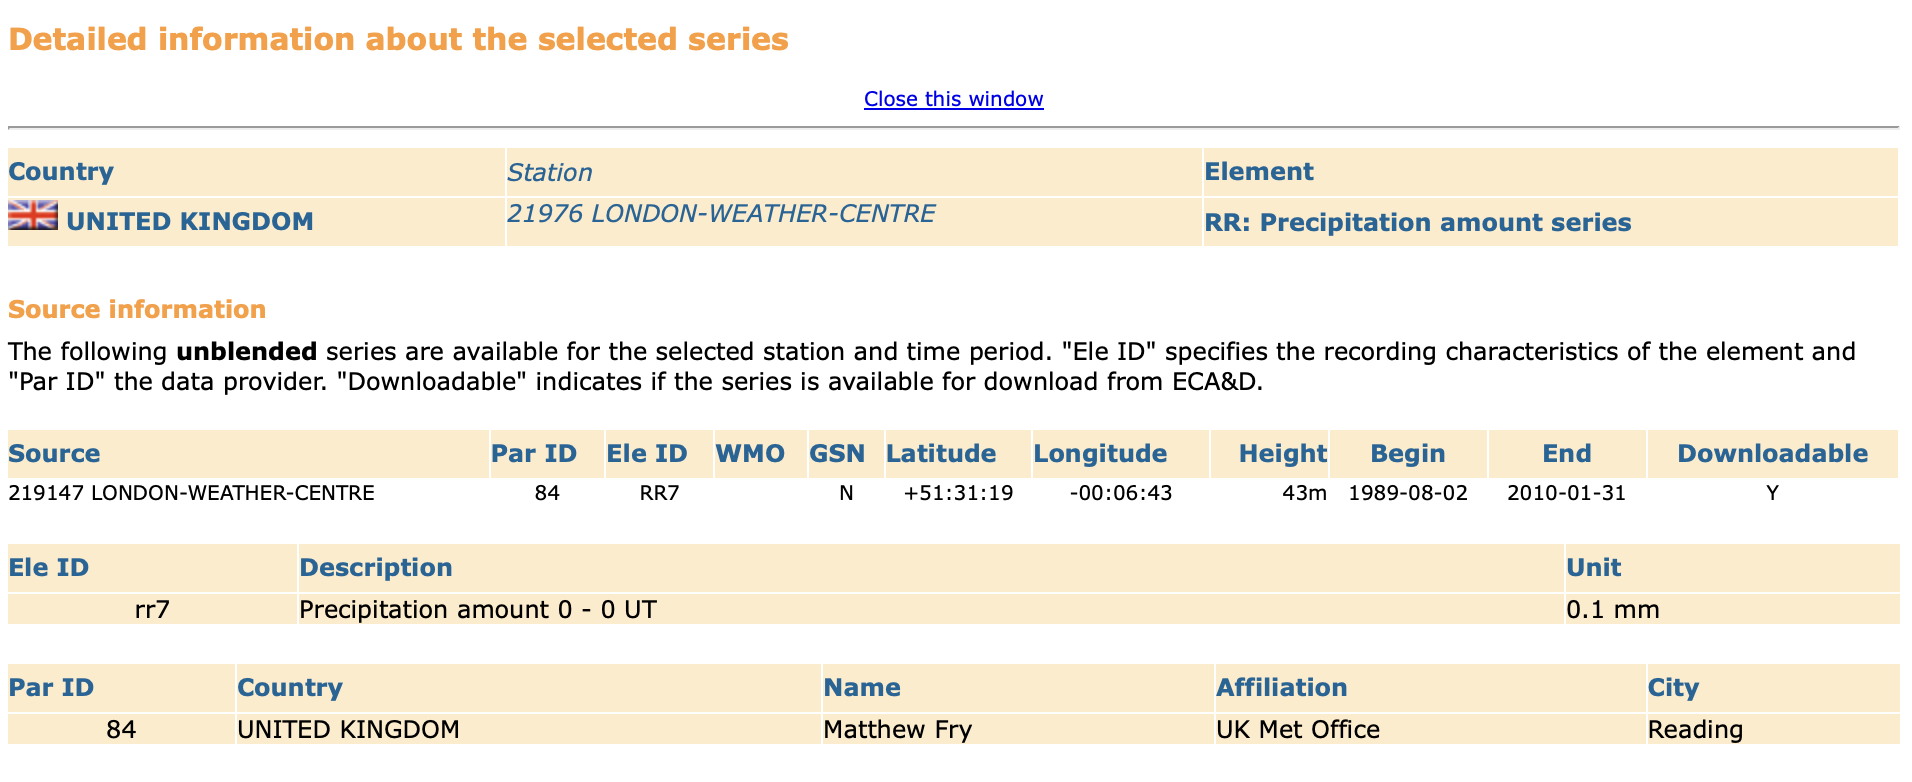

Idea on [rainfall ammount](https://www.baranidesign.com/faq-articles/2020/1/19/rain-rate-intensity-classification) is useful for creating binns accordingly to intensity.

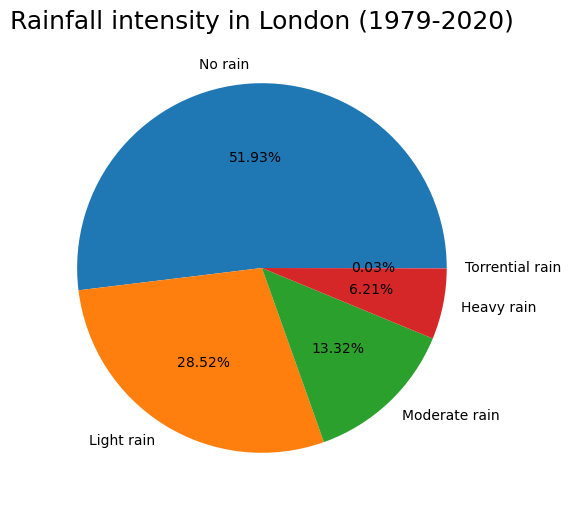

In [161]:
# Binning the categories of rain by itensity 
# Rainfall ammount is given in mm 

# Define the bins and their labels
bins = [-1, 0, 2.5, 7.6, 50, float('inf')]
labels = ['No rain', 'Light rain', 'Moderate rain', 'Heavy rain', 'Torrential rain']

# Create a new column for the bins (NaNs are automatically separated)
weather['precipitation_bins'] = pd.cut(weather['precipitation'], bins=bins, labels=labels)

# Count the number of occurrences of each category
counts = weather['precipitation_bins'].value_counts()

# Pie chart for our different intensities 
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.2f%%') # 2 digits and percentage
plt.title('Rainfall intensity in London (1979-2020)', size=18)
plt.show()


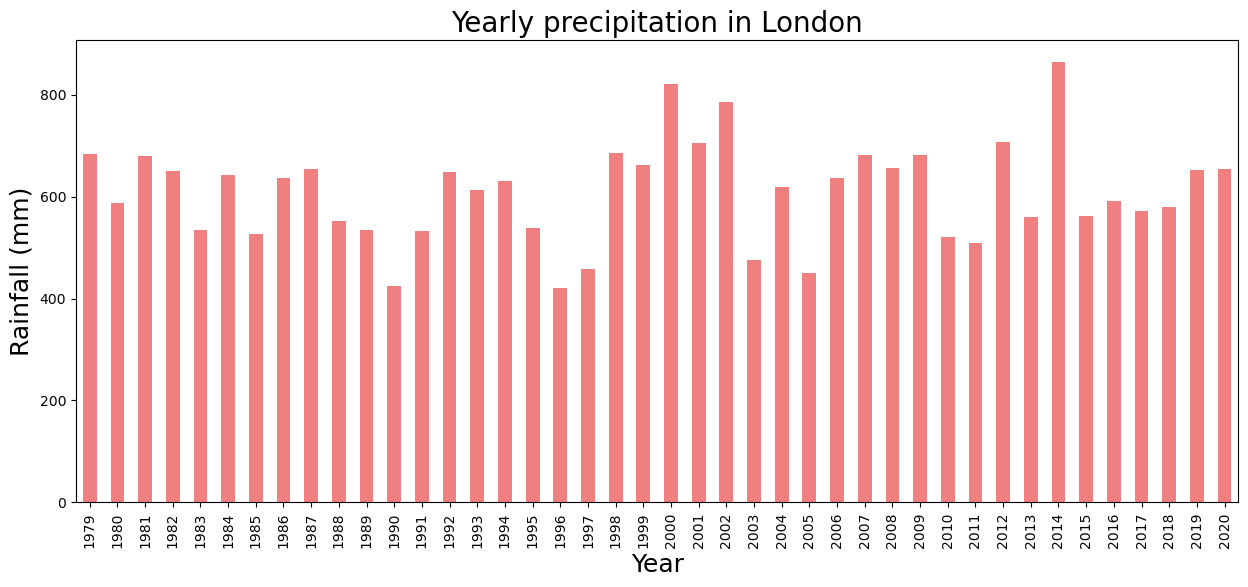

In [162]:
# Total precipitation for each year in the data
yearly_precipitation = weather['precipitation'].resample('Y').sum()


# Find the year with maximum and minimum precipitation
max_date = yearly_precipitation.idxmax()
min_date = yearly_precipitation.idxmin()
max_date_year = max_date.year
min_date_year = min_date.year

# Bar plot 
ax = yearly_precipitation.plot(kind='bar', figsize=(15, 6), color='lightcoral' ) # axes object

# Set x-axis labels to show only the year part of the date
ax.set_xticklabels([x.strftime('%Y') for x in yearly_precipitation.index])


plt.xlabel('Year', size= 18)
plt.ylabel('Rainfall (mm)', size=18)
plt.title('Yearly precipitation in London', size=20)
plt.show()


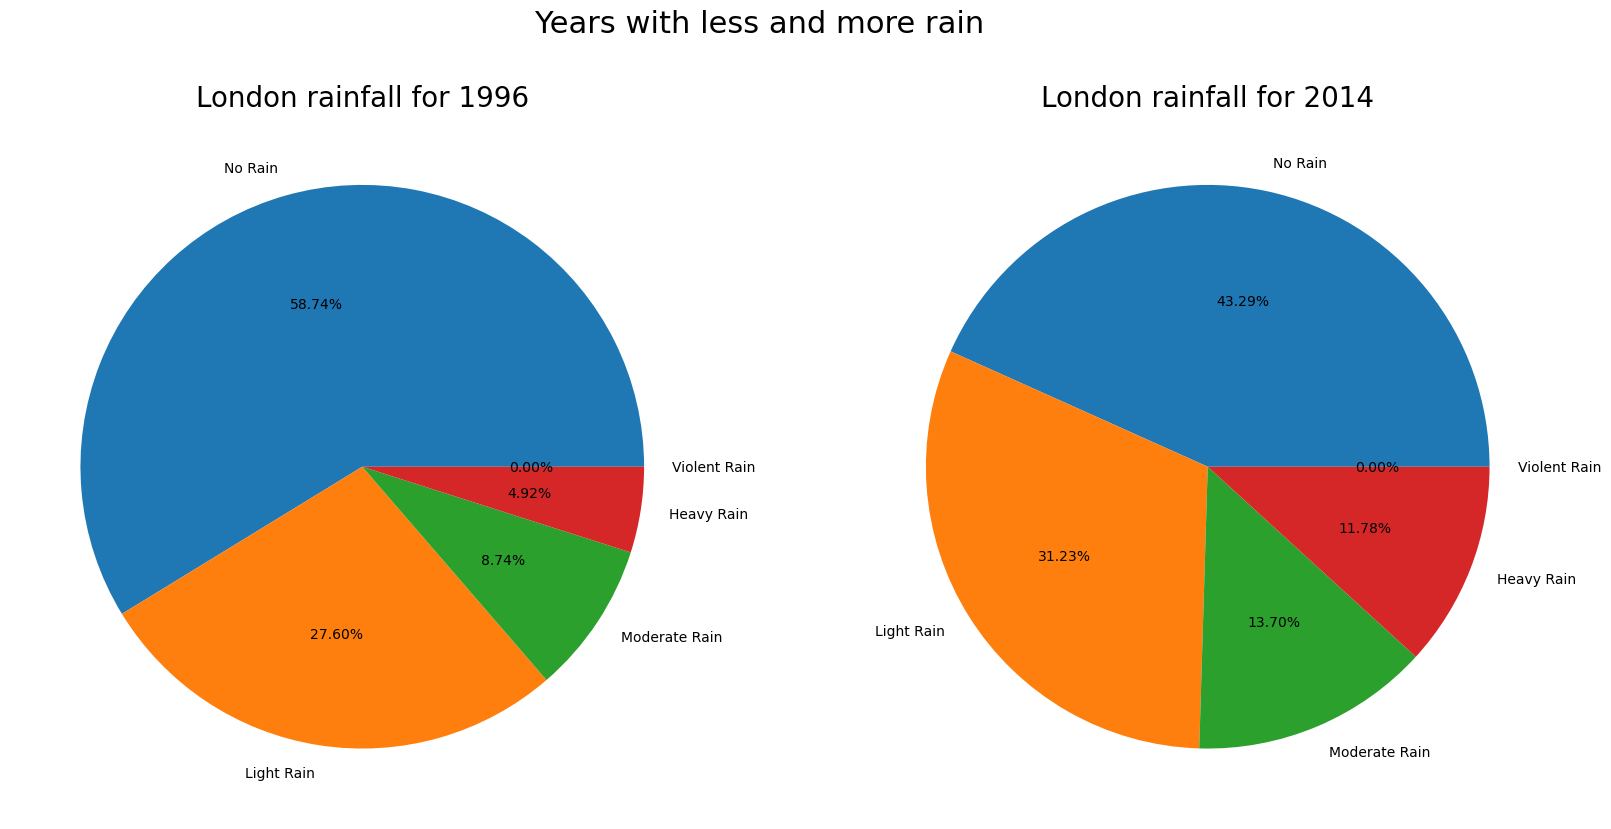

In [163]:
# With the years of maximum and minimum rainfall ammount

years = [min_date_year, max_date_year]

# Bins and labels
bins = [-1, 0, 2.5, 7.6, 50, float('inf')]
labels = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Violent Rain']

# Subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 15))

for i, year in enumerate(years):
    # Create a mask 
    mask = (weather.index.year == year)

    # Selection in the range of interest
    weather_select = weather.loc[mask].copy()

    # Create a new column in the DataFrame for the categories
    weather_select['precipitation_bins'] = pd.cut(weather_select['precipitation'].interpolate(method='polynomial', 
                                                                order=3), bins=bins, labels=labels)
    # Count the number of occurrences of each itensity
    counts = weather_select['precipitation_bins'].value_counts()

    # Pie chart for our different intensities 

    axs[i].pie(counts, labels=counts.index, autopct='%1.2f%%')
    axs[i].set_title(f'London rainfall for {year}', size=20)

fig.suptitle('Years with less and more rain', size=22, y=0.8)
plt.show()


- 1996 was a less rainy year 
- 2014 was a more rainy year 
- In both cases, majority of the rain is **light rain**, which can be persistent

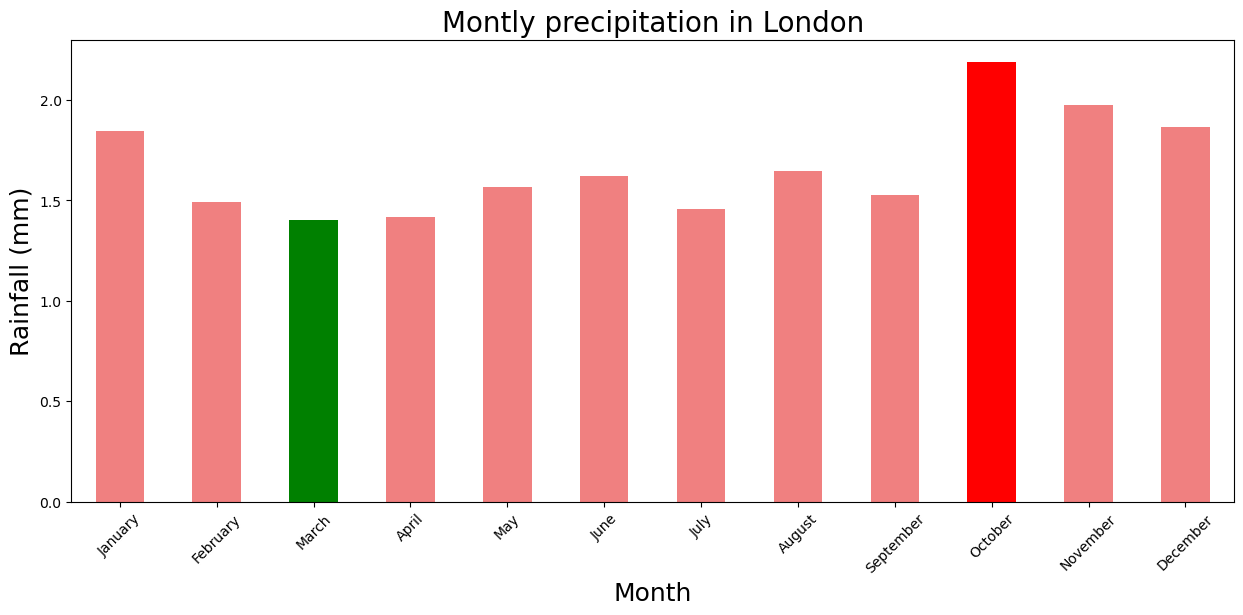

In [164]:
# Total precipitation by month 
import calendar

monthly_precipitation = weather['precipitation'].groupby(weather.index.month).mean()


# Find the year with maximum and minimum precipitation
max_month = monthly_precipitation.idxmax()
min_month = monthly_precipitation.idxmin()


# Bar plot 
ax = monthly_precipitation.plot(kind='bar', figsize=(15, 6), color='lightcoral' ) # axes object

# Create a dictionary mapping months numbers to names
month_dict = {i: calendar.month_name[i] for i in range(1, 13)}

# Set x-axis labels to show only the month part of the date
ax.set_xticklabels([month_dict[i] for i in monthly_precipitation.index], rotation=45)

# Highlight max and min months by precipitation
ax.patches[max_month-1].set_facecolor('r')
ax.patches[min_month-1].set_facecolor('g')

plt.xlabel('Month', size= 18)
plt.ylabel('Rainfall (mm)', size=18)
plt.title('Montly precipitation in London', size=20)
plt.show()


- October is the most rainy month of the year
- March is the least rainy month of the year

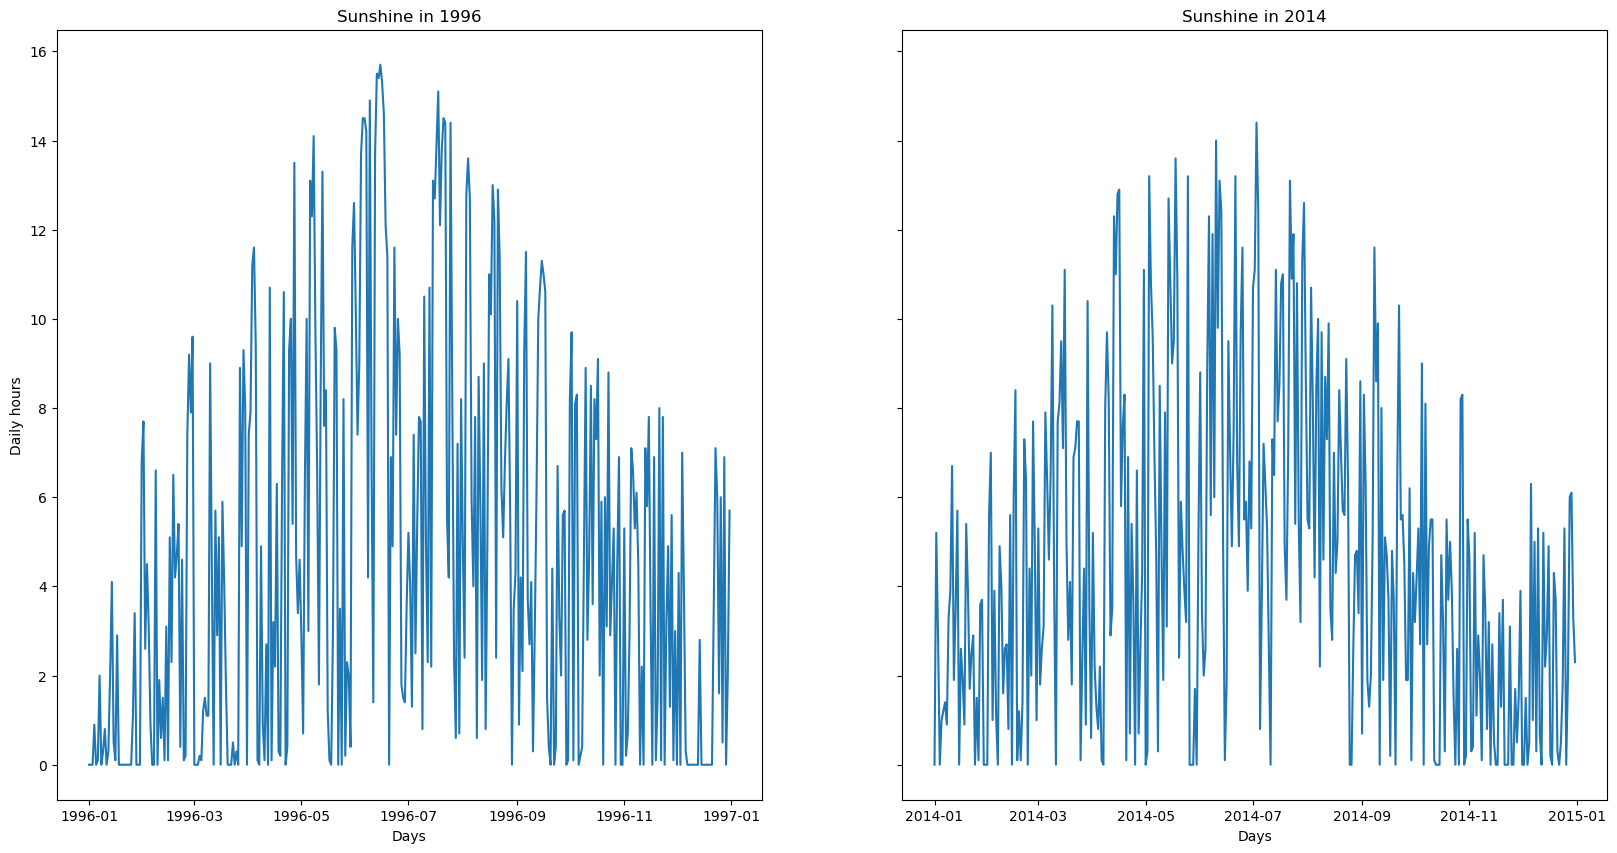

In [165]:
# sunshine in hours - direct sunlight on ground
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

axs[0].plot(weather['sunshine'][weather.index.year == 1996])

axs[0].set_xlabel("Days")
axs[0].set_ylabel("Daily hours")
axs[0].set_title('Sunshine in 1996')

axs[1].plot(weather['sunshine'][weather.index.year == 2014])
axs[1].set_xlabel("Days")
# axs[1].set_ylabel("Daily hours")
axs[1].set_title('Sunshine in 2014')

plt.show()

In [166]:
weather['sunshine'][weather.index.year == 1996].sum()

1714.9999999999998

In [167]:
weather['sunshine'][weather.index.year == 2014].sum()

1668.4

In [168]:
weather['sunshine'][weather.index.year == 1996].sum() - weather['sunshine'][weather.index.year == 2014].sum()

46.59999999999968

In [169]:
46.6/1668.4* 100
# around 3% increase of annual sunshine from the most rainy year to the least rainy year in London

2.7930951810117475

In [170]:
yearly_sunshine = weather['sunshine'].resample('Y').sum()


In [171]:
# Max of sunshine on a day
yearly_sunshine.idxmax()

Timestamp('2003-12-31 00:00:00', freq='A-DEC')

In [172]:
# Min of sunshine on a day
yearly_sunshine.idxmin()

Timestamp('1981-12-31 00:00:00', freq='A-DEC')

- Given that 1996 and 2014 were the years with less and more rain in London, respectively
- Overall sunshine across the entire year increased by about **3% between these two extreme years** 

Let us concentrate on the temperature in London for most of our exploration about London's weather over the years. 

### Missing values

Whatever is the time frequency of the dataset, missing values are like gaps that need to be filled in order to allow uniformity and continuity across the whole time series. 

In [173]:
weather.isna().sum()

cloud_cover             19
sunshine                 0
global_radiation        19
max_temp                 6
mean_temp               36
min_temp                 2
precipitation            6
pressure                 4
snow_depth            1441
precipitation_bins       6
dtype: int64

Clearly, snow_depth is the most affect feature by missing values, and sunshine, temperatures and pressure are much less affected. Precipitatation and precipitation_bins are the same, in terms of missing values, as the latter was created from the former.

In [174]:
# Check what dates have missing values for the mean_temp as this is our most interisting feature

weather.index[ weather['mean_temp'].isna() ]

DatetimeIndex(['2005-09-12', '2005-10-15', '2005-12-30', '2006-01-09',
               '2006-02-03', '2006-03-17', '2006-05-04', '2006-09-03',
               '2006-11-08', '2006-12-01', '2006-12-04', '2007-02-19',
               '2007-03-25', '2007-03-31', '2007-05-22', '2007-09-29',
               '2007-10-03', '2007-10-26', '2008-01-04', '2008-03-11',
               '2008-04-20', '2008-05-27', '2008-06-08', '2008-08-06',
               '2008-08-10', '2008-11-07', '2009-02-27', '2009-04-13',
               '2009-05-05', '2020-02-05', '2020-03-10', '2020-05-06',
               '2020-06-05', '2020-07-16', '2020-08-10', '2020-10-08'],
              dtype='datetime64[ns]', name='date', freq=None)

Changing the frequency of a the time series to longer periods is a way of averaging the data removing some noise and possily some missing data as well.

In [175]:
# Create a dataframe with a subset of the total data: annually and montly 

weather_afreq = weather.asfreq('a') #annually 
weather_mfreq = weather.asfreq('m') #montly (last day by default, or 'MS' for start of the month -  method='bfill')

In [176]:
weather_mfreq

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,precipitation_bins
date,,,,,,,,,,
1979-01-31,5.0,1.6,38.0,9.1,2.1,-3.1,2.4,101390.0,0.0,Light rain
1979-02-28,6.0,2.1,64.0,9.7,4.4,2.7,0.9,100040.0,0.0,Light rain
1979-03-31,7.0,0.2,62.0,11.6,5.4,0.3,0.1,101270.0,0.0,Light rain
1979-04-30,6.0,6.7,204.0,7.5,8.2,5.5,0.1,100820.0,0.0,Light rain
1979-05-31,7.0,0.6,108.0,18.7,13.8,11.5,0.0,101700.0,0.0,No rain
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,7.0,2.5,134.0,18.5,13.3,8.1,0.0,102190.0,NaN,No rain
2020-09-30,7.0,4.0,130.0,18.1,14.1,10.2,3.0,100870.0,NaN,Moderate rain
2020-10-31,7.0,0.0,30.0,15.6,14.5,13.5,7.0,101240.0,NaN,Moderate rain


In [177]:
# The dataset with montly data (last day of the month) shows less missing values as expected
# and will be used for discussion later

weather_mfreq.isna().sum() #still has some missing values

cloud_cover            0
sunshine               0
global_radiation       1
max_temp               0
mean_temp              1
min_temp               0
precipitation          0
pressure               0
snow_depth            47
precipitation_bins     0
dtype: int64

### Data imputation 

For a time series with temperature data, it makes more sense, for our purposes, to subsitute missing data with the previous or the next valid observation. That is so because the continuous aspect of physical quantities such as temperature, which varies continuously from day to day. That only requires one instance of the data. 
Substituting temperature missing values by mean or median would be a much more coarse-grained approach, using a typical temperature over the years or a typical day.  
Another option is to use `interpolation` from Pandas between two instances of the data, the instance before the missing value and the isntance after that. For montly data, which is less noisy than daily data, we will use interpolation, and for daily data we will use backward fill (bfill).  

In [178]:
weather['mean_temp'].fillna(method='bfill', inplace=True)

# For montly data, we can use the 'linear'method. And could use 'cubic' for weekly data,
# if necessary, as it uses more points of the dataset.

weather_mfreq['mean_temp'].interpolate(method='linear', inplace=True) 

weather_mfreq.isna().sum()

cloud_cover            0
sunshine               0
global_radiation       1
max_temp               0
mean_temp              0
min_temp               0
precipitation          0
pressure               0
snow_depth            47
precipitation_bins     0
dtype: int64

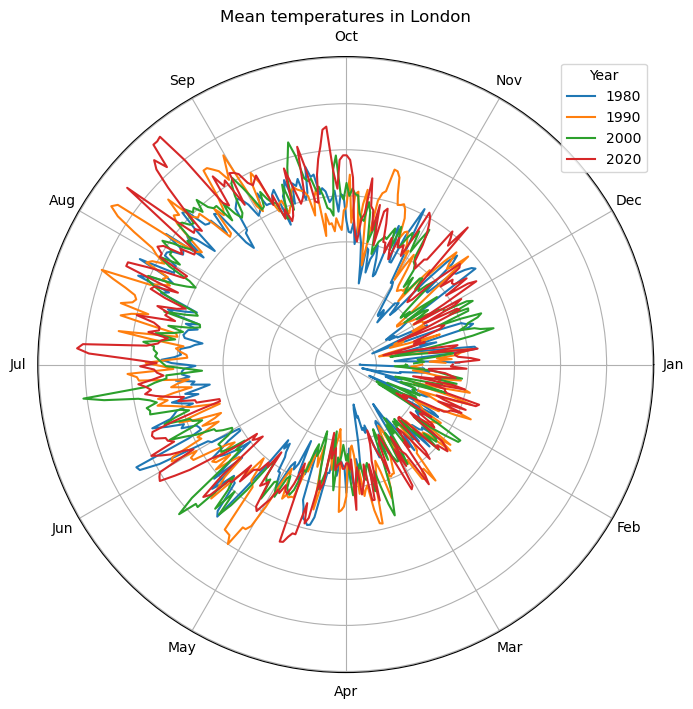

[1980, 1990, 2000, 2020]


In [179]:
# Plot a polar plot for a selection of years

# years = weather.index.year.unique()
years = [1980, 1990, 2000,  2020]  # Add more years as needed

mean_temp = weather['mean_temp']

# Define days of the year
days_in_year = 365

# Create angles for each day of the year
angles = np.linspace(0, 2 * np.pi, days_in_year, endpoint=False)

# Plot the polar seasonal plot with lines for each year
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

first_year = 1979 # year that the data starts with

for year in years:
    # Adjust the index for the current year
    start_idx = (year - first_year) * days_in_year
    end_idx = start_idx + days_in_year

    # Plot daily mean temperatures for the current year
    ax.plot(angles, mean_temp[start_idx:end_idx], label=str(year))

# Set a clockwise direction starting from January
ax.set_theta_direction(-1) 
# ax.set_theta_offset(np.pi/2.0) # start from 90 degrees   
    
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_yticklabels([])  # Hide radial axis labels

# Add a legend
plt.legend(title='Year')

# Set plot title (Polar Seasonal Plot for some years)
plt.title('Mean temperatures in London')

# Show the plot
plt.show()

print(years)



The polar plot clearly shows that there are more maxima value for the mean temperature of more recent years, such as $2020$, than for the mean temperature of older years such as $1980$. Additionally, the inward peaks (corresponding to minimum values of the mean temperature) are often more extreme (lower temperatures) for older years than to more recent ones. Based on the four years chosen above, it seems tha, on average, the mean temperature has increased from far past to more recent years.

### Time series decomposition 

In [180]:
# We will restrict the analysis to fewer, but more useful for our purposes, features.

weather.drop(columns=['snow_depth', 'cloud_cover', 'sunshine', 'global_radiation'], inplace=True)

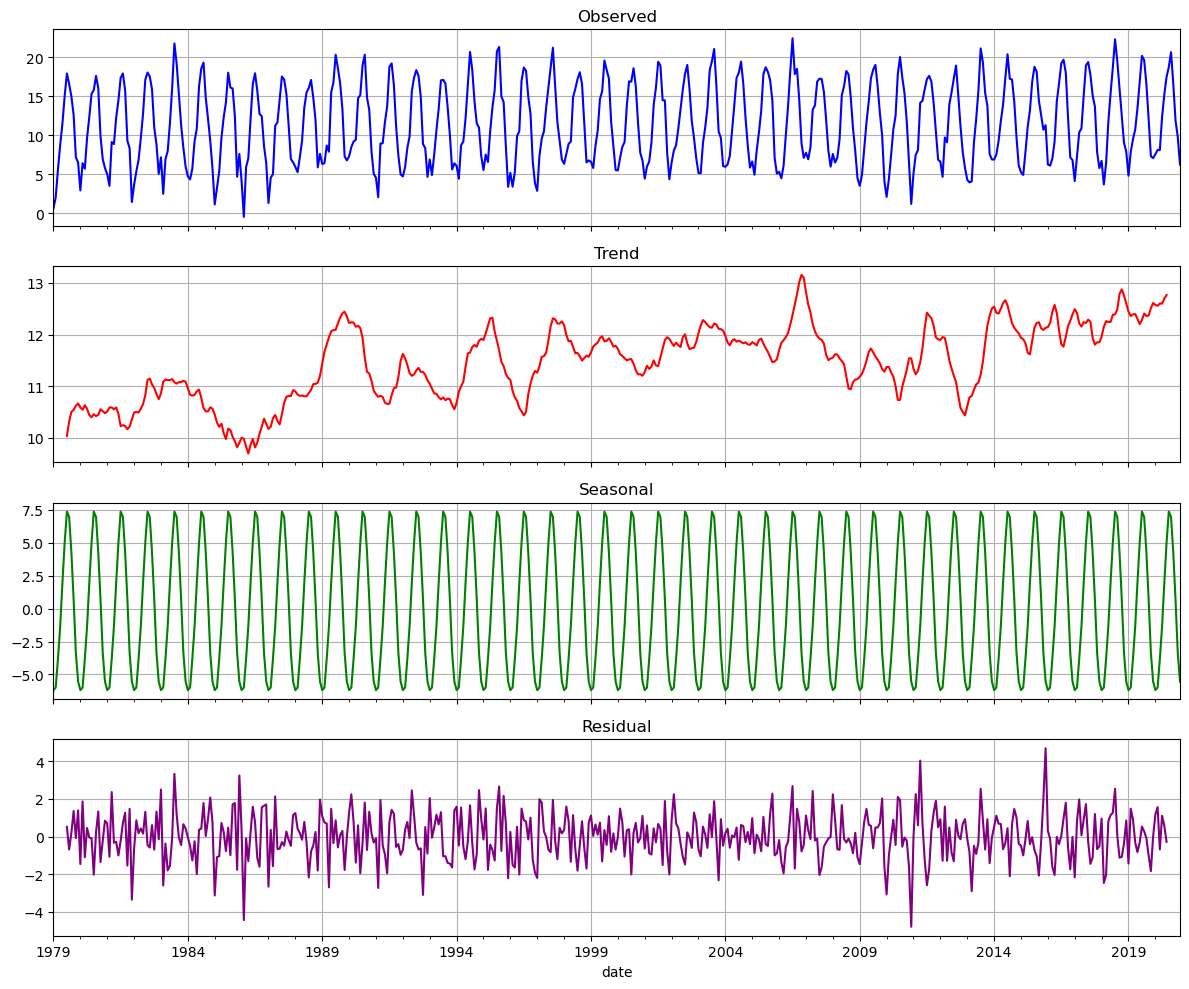

In [181]:
# Let us choose a time range
start_date = '1979-01-01'
end_date = '2020-12-31'

# Subset of the data corresponding to the chosen time range
weather_subset= weather[start_date:end_date]

# Calculate monthly averages (aggregation) for temperature
# Note: taking the mean value of all days in a given month to represent that month

monthly_avg = weather_subset.resample('M').mean(numeric_only=True)


# Create a new variable for interpolated 'mean_temp' values (because of missing values in mean temperature)
interpolated_mean_temp = monthly_avg['mean_temp'].interpolate(method='polynomial', order=1)
# alternatively, increase the degree of the polynomial to '3'                                                               

# Perform a seasonal decomposition on the interpolated data
decomp_result = sm.tsa.seasonal_decompose(interpolated_mean_temp, model='additive')  # or 'multiplicative' for a multiplicative model

# Create a new DataFrame with the decomposition components and the original time series
decomposed_data = pd.DataFrame({
    'Observed': interpolated_mean_temp,
    'Trend': decomp_result.trend,
    'Seasonal': decomp_result.seasonal,
    'Residual': decomp_result.resid
})

# Plot the decomposition components

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

decomposed_data['Observed'].plot(ax=axes[0], title='Observed', color='blue')
decomposed_data['Trend'].plot(ax=axes[1], title='Trend', color='red')
decomposed_data['Seasonal'].plot(ax=axes[2], title='Seasonal', color='green')  # Adjust the y-axis limits
decomposed_data['Residual'].plot(ax=axes[3], title='Residual', color='purple')

for ax in axes.ravel():
    ax.grid(True)

plt.tight_layout()
plt.show()

In [182]:
# Montly averages of mean temperatures
monthly_avg['mean_temp']

date
1979-01-31     0.616129
1979-02-28     2.042857
1979-03-31     5.587097
1979-04-30     8.743333
1979-05-31    11.490323
                ...    
2020-08-31    20.651613
2020-09-30    16.616667
2020-10-31    11.890323
2020-11-30     9.806667
2020-12-31     6.232258
Freq: M, Name: mean_temp, Length: 504, dtype: float64

The result show an increasing trend from past time to more recent years. The seasonal pattern is as expected, each year starts with a lower mean temperature, when it is winter in the UK, and reaches a maximum around the middle of the year (June/July: summer). After that, temperatures fall again until the end of the year in December, when it is winter again. Finally, the residual part corresponds to some random noise if the decomposition was correctly performed.

#### Stationarity 

A stationary random process preserves the statistical properties over time.
In particular, all multiple-time joint probability densities that describe the random process at any sucessive instants of time are independent of the overall origin in the time variable. Thus, **all** joint probability densities and **all** multiple-time averages depend only on relative time intervals. When that is true, the process is *strictly* stationary. Sometimes, weaker notions of stationarity are more appropriate.

In particular, the Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is non-stationary or not. **The null hypothesis assumes that the series is non-stationary**. In case of evidence against the null hypothesis, the series could be stationary, strictly speaking, or it can also be a weaker version to the strict stationarity, such as the trend stationarity. Strict stationarity is harder to prove.  

Another test, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), does not test for the existence for unit root in the characteristic equation of the time series, but it is used for testing the null hypothesis that the series is level/trend stationary.

In [183]:
# all years with a montly frequency
dft_results = sm.tsa.stattools.adfuller(monthly_avg['mean_temp']) #regression = 'c' ('c': constant only. Alternative: stationary)

print(f"""Dickey-Fuller test result gives:
------------------------------------
test statistics = {dft_results[0]},
p-value = {dft_results[1]},   
number of lags = {dft_results[2]},
number of observations = {dft_results[3]}""")
for key, value in dft_results[4].items():
    print(f" critical value at {key}: {value}")  
      
print(f' maximised information criterion = {dft_results[5]}')


# lags + observations used = total length of data

Dickey-Fuller test result gives:
------------------------------------
test statistics = -3.1527266010986232,
p-value = 0.022889366738371303,   
number of lags = 14,
number of observations = 489
 critical value at 1%: -3.4437936797256317
 critical value at 5%: -2.867468682890213
 critical value at 10%: -2.5699277594606915
 maximised information criterion = 1782.289492556581


The result of the test shows that at a confidence level $\alpha=5\%$, there is evidence against the null hypothesis on the non-stationarity of the time series, but that is a weak evidence, and at $\alpha=1\%$, there is no enough evidence against the null.

In [184]:
# Test for the entire data set and mean temperature (daily)
sm.tsa.stattools.adfuller(weather['mean_temp'])

(-8.582089615326517,
 7.679645214693458e-14,
 43,
 15297,
 {'1%': -3.430777560807923,
  '5%': -2.86172896365022,
  '10%': -2.5668705807433336},
 62798.46057633619)

If we use the entire time series, with daily measurements, the result of the test is that there is enough statistical evidence against the hypothesis that the series is non-stationary (in the sense of the existence of a unit root). However, the daily data with over 40 years of measurements has much noise compared to the montly averaged data that we are considering for our analysis here.

Back to our montly averaged data, if we change the regression to "ct", we will consider the alternative hypothesis that the time series is stationary around a deterministic linear trend, while the default option (regression="c") has alternative hypothesis that the time series is stationary around a non-zero mean, a constant value (a drift in a random walk). 
Thus, the former tests for trend stationarity and the latter tests for level stationarity.

In [185]:
# using the montly_avg instead of the mfrquency shows that the series
# has some non-stationarity (Null), while the mfreq shows trend stationarity
sm.tsa.stattools.adfuller(weather_mfreq["mean_temp"], regression='ct')

(-8.168257869235235,
 2.9181667660936305e-11,
 17,
 486,
 {'1%': -3.9775193041334087,
  '5%': -3.4195623964933355,
  '10%': -3.1323869771265507},
 2474.547611749287)

In [186]:
sm.tsa.stattools.adfuller(monthly_avg['mean_temp'], regression='ct') #regression = 'ct'
#(constant and trend. Alternative: trend-stationary with linear trend)

# result: Reject Null in favour of a trend-stationarity

(-5.651702734720628,
 1.1470369220462372e-05,
 18,
 485,
 {'1%': -3.977558215998501,
  '5%': -3.4195811831422644,
  '10%': -3.132398016343203},
 1767.0058207699694)

For the ADF test, the default information criterion used is the AIC (Akaike Information Criterion, 1974), which applies a penalty in the models that grows proportional to $2K$, where $K$ is the number of parameters fitted in the model. BIC (Bayesian Information Criterion), however, has a penalty to the complexity of the model that grows with  $2\log(N)K$, where $N$ is the number of obseravtions in the time series. Thus, for most of the practical cases (where $N>7$), BIC will provide simpler models, with less parameters. We can also check if that will affect or not the result of the ADF test below

In [187]:
#Check: different choice of fitting model
sm.tsa.stattools.adfuller(monthly_avg['mean_temp'], regression='ct', autolag="BIC") #regression = 'ct'
#(constant and trend. Alternative: trend-stationary with linear trend)

# result: Reject Null in favour of a trend-stationarity

(-4.163612665317434,
 0.005077473786911829,
 12,
 491,
 {'1%': -3.9773271377591177,
  '5%': -3.4194696160270004,
  '10%': -3.1323324576820575},
 1844.3721305368792)

Based on the p-value of the test above, using an alternative hypothesis of a trend stationarity series, there is evidence to reject the null hypothesis.

Finally one can also reverse the hypothesis test using a test that adopts stationarity (in its weak form) as the null hypothesis and an alternative hypothesis that the time series is non-stationary, the Kwiatkowski-Phillips-Schmidt-Shin test, or KPSS. 

In [188]:
# KPSS test with stationary null

from statsmodels.tsa.stattools import kpss


statistic, p_value, n_lags, critical_values = kpss(monthly_avg['mean_temp'], regression='c')
# Null: stationary around a constant (level stationary)

print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print(f'Critical Values: {critical_values}')

#Result: reject null

KPSS Statistic: 1.0519276475274706
p-value: 0.01
num lags: 9
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/mq/lq3n_10s3jd_qfxxwqmx89mc0000gn/T/ipykernel_17287/3472459204.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(monthly_avg['mean_temp'], regression='c')


In [189]:
# KPSS test with trend stationary null

from statsmodels.tsa.stattools import kpss

statistic, p_value, n_lags, critical_values = kpss(monthly_avg['mean_temp'], regression='ct')
# Null: linear trend stationary 

print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print(f'Critical Values: {critical_values}')

# Result: fail to reject the null (even at 10% level)

KPSS Statistic: 0.028951460099280603
p-value: 0.1
num lags: 8
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


/var/folders/mq/lq3n_10s3jd_qfxxwqmx89mc0000gn/T/ipykernel_17287/98913772.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(monthly_avg['mean_temp'], regression='ct')


The KPSS test gives further statistical evidence that our time series is a trend stationary, which is good for the prediction of the models and for facilitating the understanding of the dynamics governing the time series.  

In [190]:
# # Optional: checking a differencing process with order 12 (12 months)
# diff_series = monthly_avg['mean_temp'].diff(12).dropna()
# diff_series.plot()

# print(sm.tsa.stattools.adfuller(diff_series))

### Autocorrelation functions and correlogram

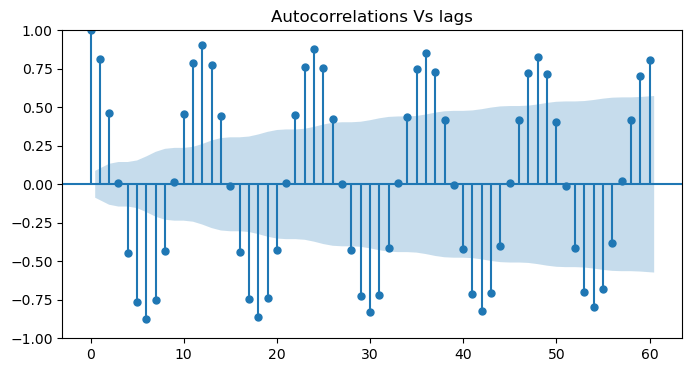

In [191]:
# Correlogram in time series is given by the sample autocorrelation against number of lags


# Plot the correlogram
fig, ax = plt.subplots(figsize=(8,4))

sm.graphics.tsa.plot_acf(monthly_avg["mean_temp"].values.squeeze(), lags=60, ax=ax, zero=True)
plt.title("Autocorrelations Vs lags")
# plt.ylim([-0.2,1])
plt.show()

Note that after 6 months from the initial point in time, there is a maximum of negative correlation, meaning there is a clear opposite pattern between January (colder) and July (warmer). Similarly, after 12 lags (12 months) the positive correlation is maximum positive, which makes sense as the seasonality of the year repeats over the years, namely, winter will be back in 12 months, for instance.

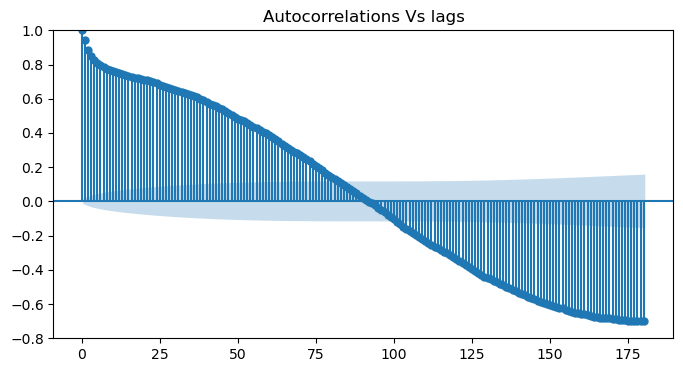

In [192]:
# Correlogram for the full dataset (w.r.t mean temperatures)
# Note: this is a daily dataset 

fig, ax = plt.subplots(figsize=(8,4))

sm.graphics.tsa.plot_acf(weather["mean_temp"].values.squeeze(), lags=180, ax=ax)
plt.title("Autocorrelations Vs lags")
plt.ylim([-0.8,1])
plt.show()

We see that around a period of 90 days, there is a change in the sign of the correlation on the daily dataset, that is around every 3 months, the weather, more specifically the mean temperature is considerably chanhing its behaviour: instead of low temperatures, we have higher temperatures, and vice-versa. After 360 days, one complete year, the correlation is again very positive, but it will not be maximum (=1) anymore as we are dealing with a natural phenomena that has random effects, and possibly a positive trend into the future. In the plot below, note the correlation after 1 year and after 4 years are gone, and observe that the correlation peak decreases while the confidence intervals increase due to the higher uncertainty  into the future. 

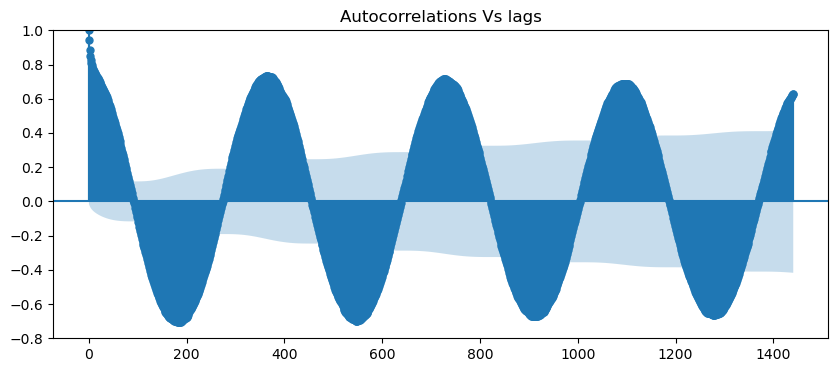

In [193]:
# Correlogram for the full dataset (w.r.t mean temperatures)
# Note: this is a daily dataset 

fig, ax = plt.subplots(figsize=(10,4))

sm.graphics.tsa.plot_acf(weather["mean_temp"].values.squeeze(), lags=360*4, ax=ax)
plt.title("Autocorrelations Vs lags")
plt.ylim([-0.8,1])
plt.show()

When we want to check the direct correlation between two periods in time taking into account the correlation effect from other lags in between, the partial autocorrelation is the function that will measure that. Below, we see that after 12 months, all the (partial) correlations (mean temperatures during different months over the next years) are contained inside the confidence interval, meaning they are of the same effect of the model's uncertainty, and we have no reason to believe that a temperature in the far feature has any correlation to the temperature of the day today  

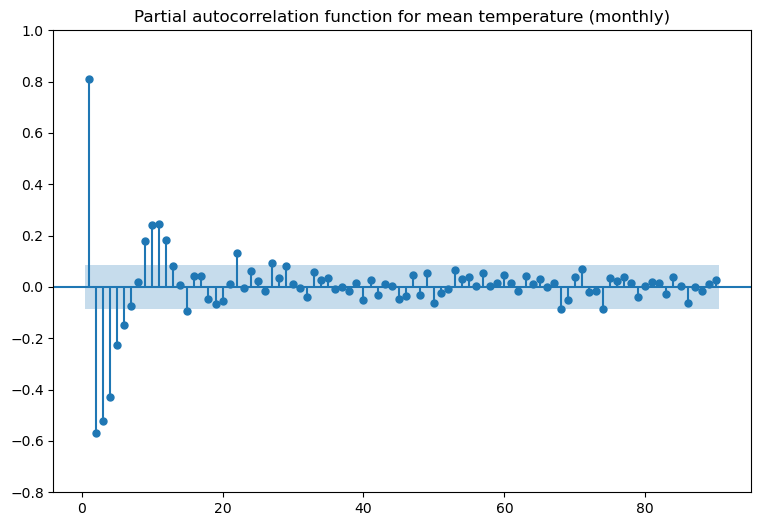

In [194]:
fig, ax = plt.subplots(figsize=(9,6))

sm.graphics.tsa.plot_pacf(monthly_avg['mean_temp'], lags=90, zero=False, method=('ldb'), 
                          ax=ax)
plt.title('Partial autocorrelation function for mean temperature (monthly)')
plt.ylim([-0.8,1])
plt.show()

If we examine the daily data, it reveals that most of the correlations between today and the future are substantially confined within a range of 10 to 15 days. There is only one day that is very positively correlated with today, which is tomorrow, corresponding to one lag only. It makes sense for the prediction model to consider no  more than 15 lags. As physical macroscope effects, temperatures  do not jump, they have values on the continuum of the real line. Therefore, the next day (tomorrow) is the most relevant day, having a linear relationship with today.

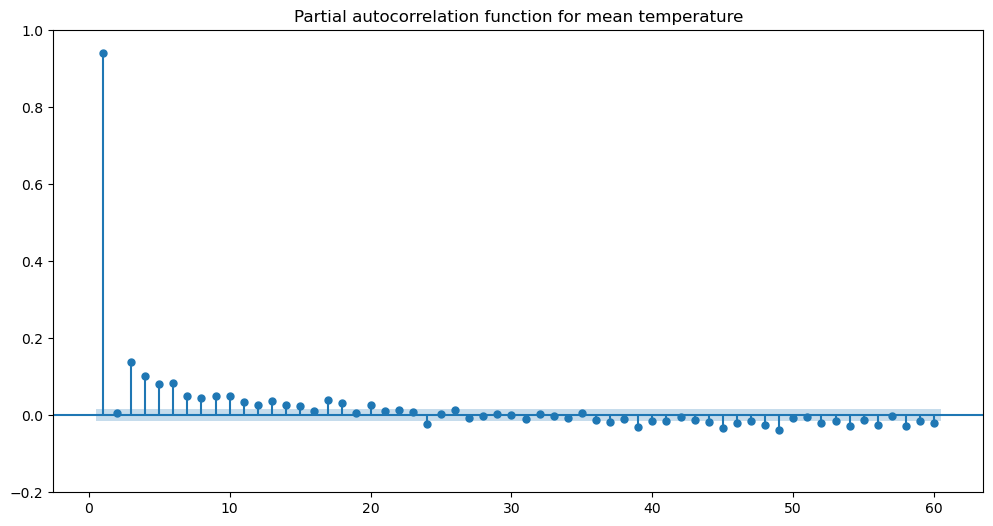

In [195]:
fig, ax = plt.subplots(figsize=(12,6))
sm.graphics.tsa.plot_pacf(weather['mean_temp'], lags=60, zero=False, method=('ldb'),
                         ax=ax)
plt.title('Partial autocorrelation function for mean temperature')
plt.ylim([-0.2,1])
plt.show()

When deciding the number of lags for the model, one approach is to consult the partial autocorrelation. The partial autocorrelation can help isolate the direct influence of a point in time (Day) on another. This is useful because it removes the effects of other time points, allowing us to see the relationship between the two points more clearly.

Choosing the appropriate number of lags can provide useful information when creating **Autoregressive models**. These models, such as AR and ARIMA, are used to describe time-varying process in order to make predictions or forecasts. The general idea is to reduce a problem situation into regular variations and pure randomness, and use these regularities as the basis for our predictions.    

**Next notebooks** include some of these predictive analytics, as well as more descriptive analytics about this data on London's Weather.